<a href="https://colab.research.google.com/github/tigerak/1st_practice/blob/main/%EC%84%A0%ED%98%95%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형회귀


## 캘리포니아 주택 데이터

In [16]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
print(california.keys())
print(california.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR'])
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the 

In [17]:
import pandas as pd
 
california_df = pd.DataFrame(california.data, columns = california.feature_names)
california_df['Target'] = california.target
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [18]:
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


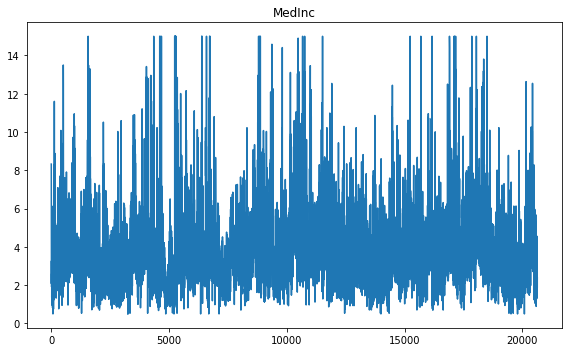

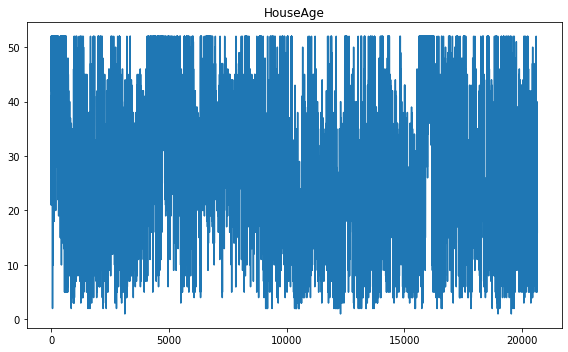

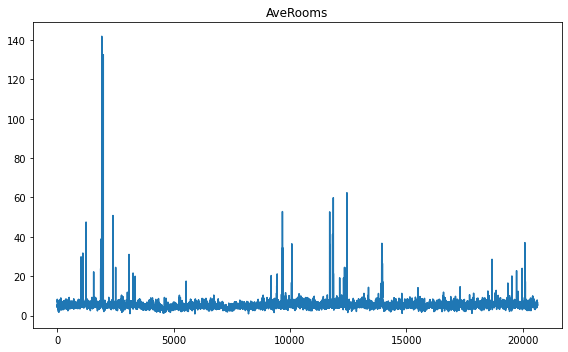

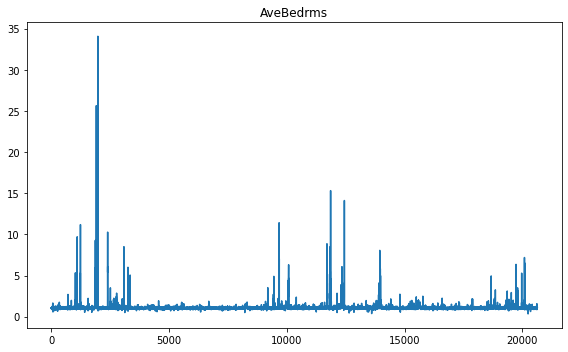

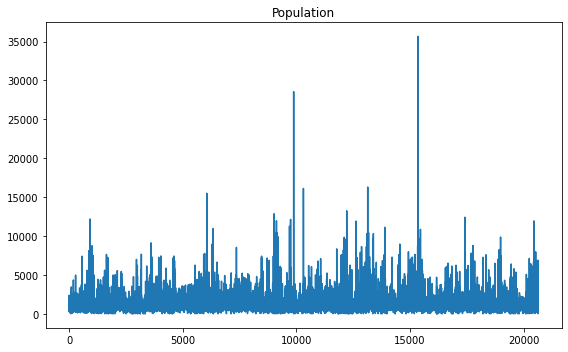

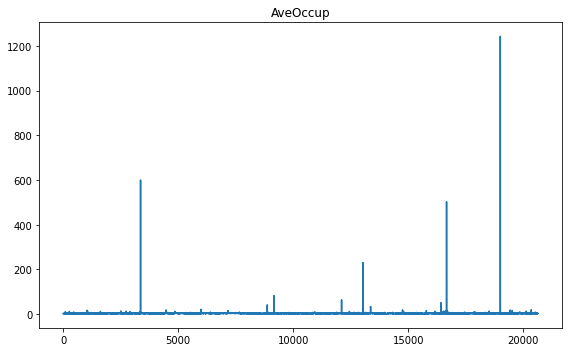

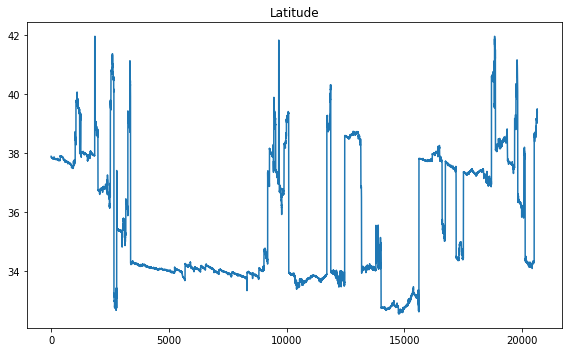

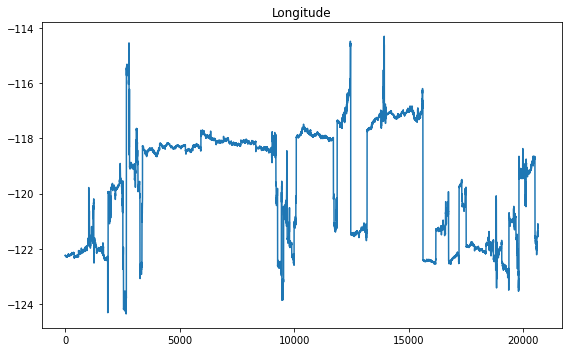

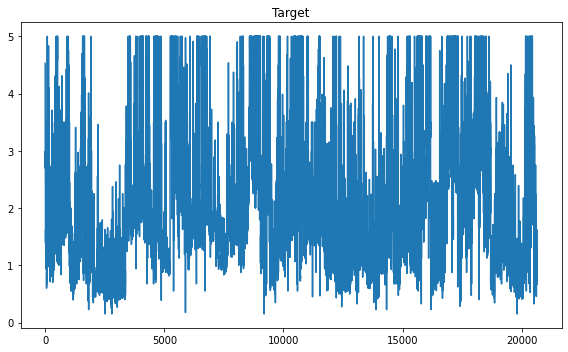

In [19]:
import matplotlib.pyplot as plt

for i, col in enumerate(california_df.columns):
    plt.figure(figsize=(8, 5))
    plt.plot(california_df[col])
    plt.title(col)
    plt.tight_layout()

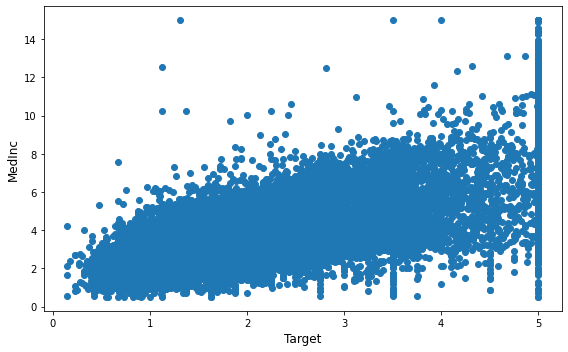

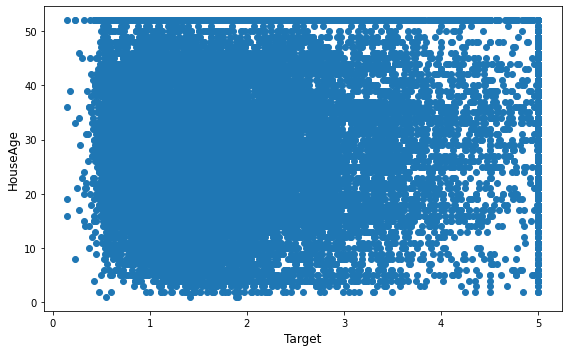

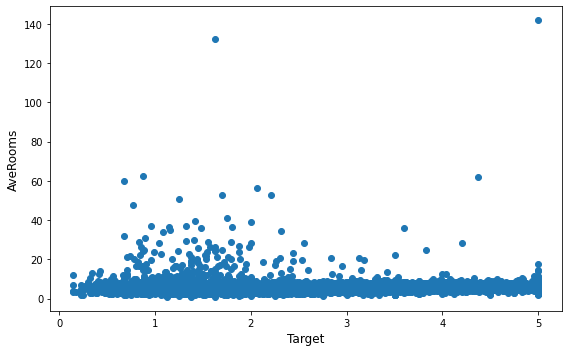

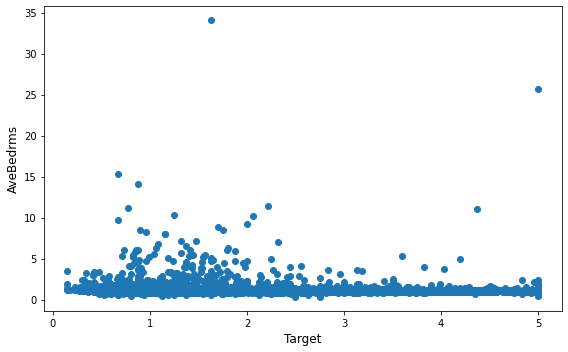

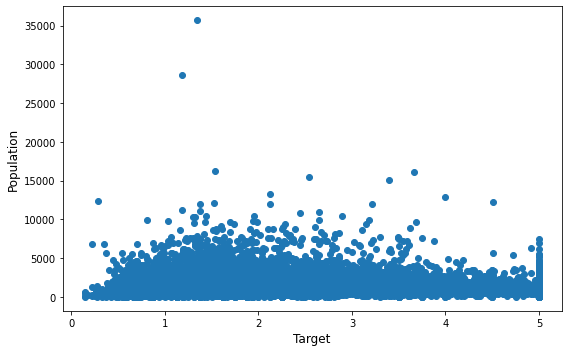

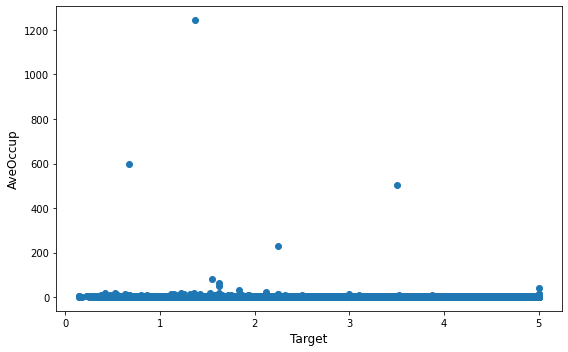

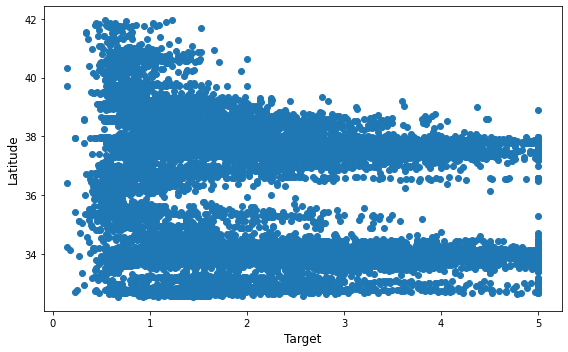

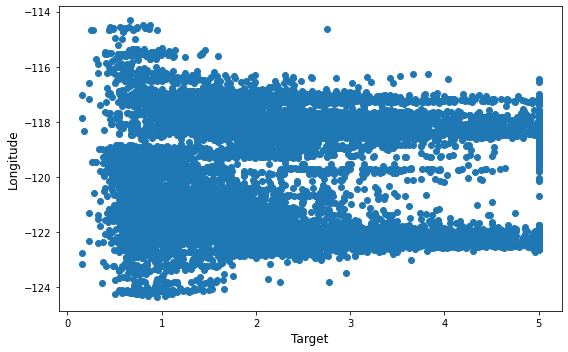

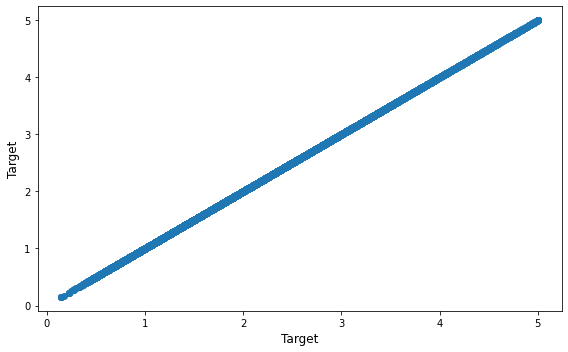

In [20]:
for i, col in enumerate(california_df.columns):
    plt.figure(figsize=(8, 5))
    plt.scatter(california_df['Target'], california_df[col])
    plt.xlabel('Target', size=12)
    plt.ylabel(col, size=12)
    plt.tight_layout()

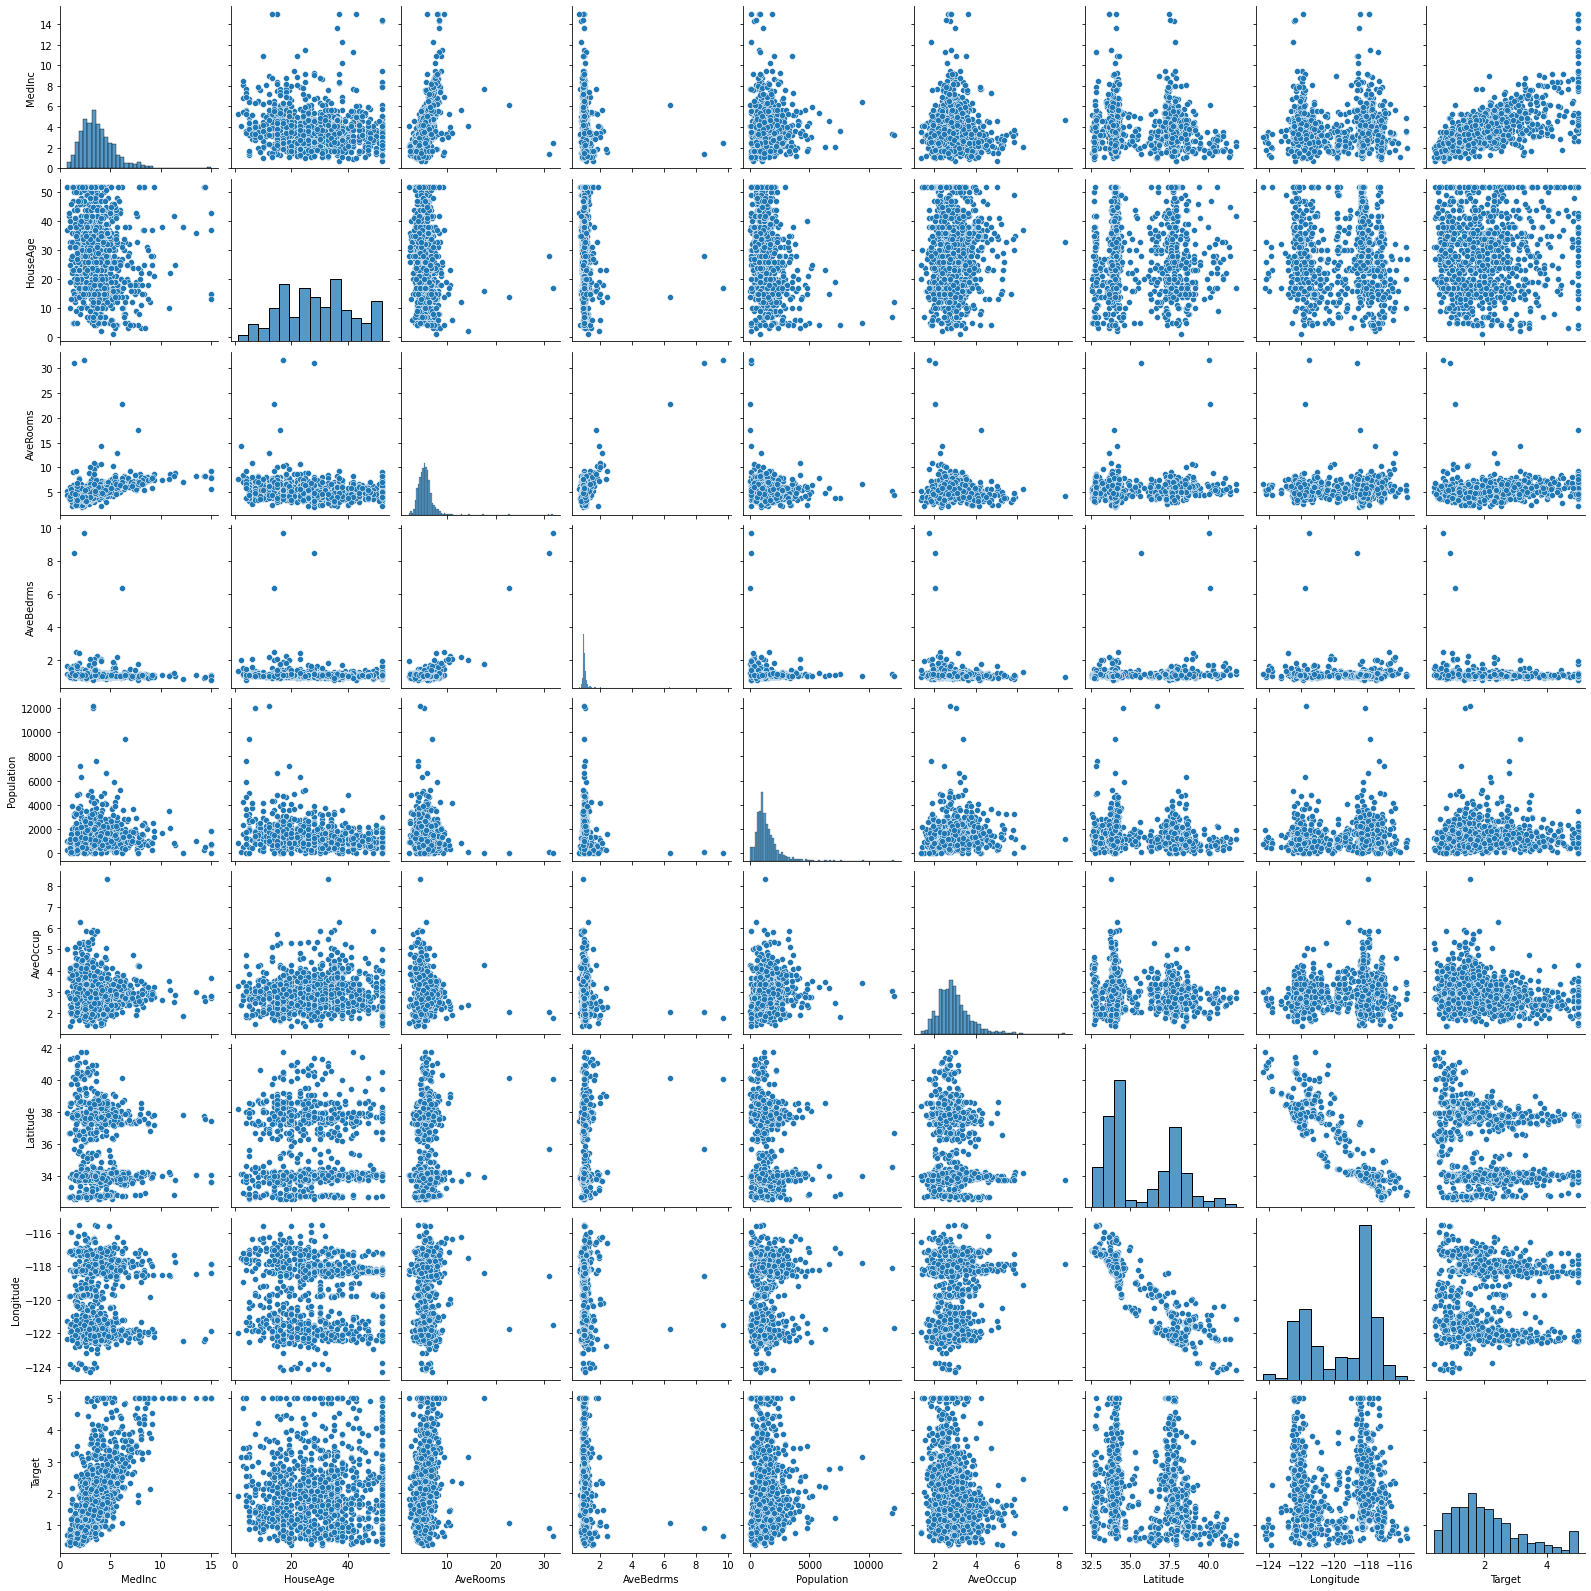

In [21]:
import seaborn as sns

sns.pairplot(california_df.sample(1000));

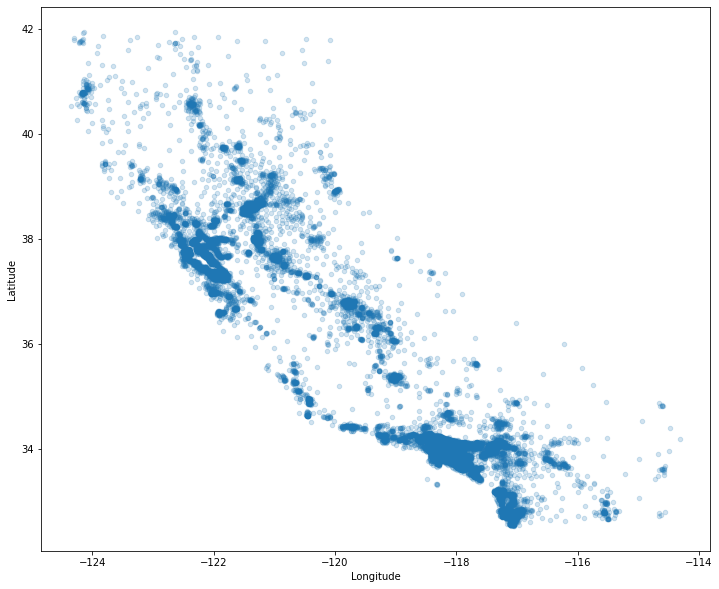

In [22]:
california_df.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.2, figsize=(12,10));

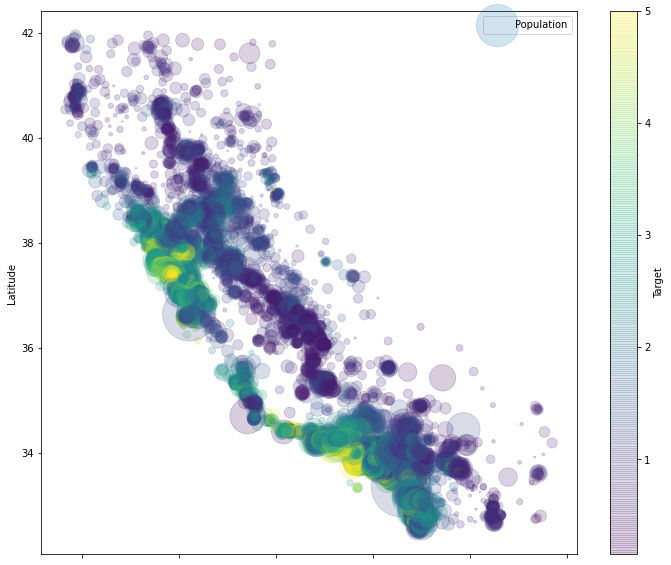

In [23]:
california_df.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.2, \
                   s=california_df['Population']/10, label='Population', figsize=(12,10), \
                   c='Target', cmap=plt.get_cmap('viridis'), colorbar=True);

## 캘리포니아 주택 가격에 대한 선형회귀

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

model = LinearRegression(normalize=True)

X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, \
                                                    test_size=0.2, random_state=125)
model.fit(X_train, y_train)
print('Train Scores : {}'.format(model.score(X_train, y_train)))
print('Test Scores : {}'.format(model.score(X_test, y_test)))

scores = cross_val_score(model, california.data, california.target, cv=10, scoring='neg_mean_squared_error')
print('NMSE mean : {}'.format(scores.mean()))
print('NMSE std : {}'.format(scores.std()))

r2_scores = cross_val_score(model, california.data, california.target, cv=10, scoring='r2')
print('R2 Score mean : {}'.format(r2_scores.mean()))

Train Scores : 0.6038381310440168
Test Scores : 0.6149716055425621
NMSE mean : -0.5509524296956642
NMSE std : 0.19288582953865108
R2 Score mean : 0.5110068610523768


In [91]:
print('y = ' + str(model.intercept_) + ' ')
for i, c in enumerate(model.coef_):
    print(str(c) + ' * x' + str(i))

y = -37.748667489796915 
0.42956977234337657 * x0
0.009138728315419429 * x1
-0.09940004638588941 * x2
0.5984912799920723 * x3
-7.751978905646956e-06 * x4
-0.0033460165761985336 * x5
-0.43038392426609 * x6
-0.4443633323094282 * x7


In [92]:
y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print('RMSE : {}'.format(rmse))
print('R2 Score : {}'.format(r2))

RMSE : 0.7240783321684612
R2 Score : 0.6038381310440168


In [93]:
y_test_predict = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print('RMSE : {}'.format(rmse))
print('R2 Score : {}'.format(r2))

RMSE : 0.7247057467640994
R2 Score : 0.6149716055425621


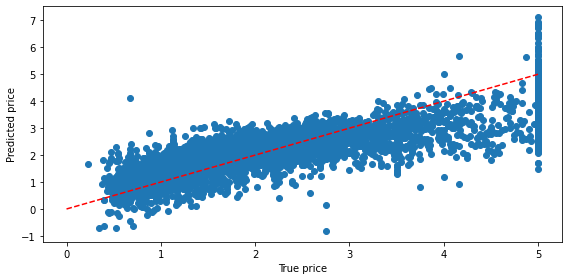

In [94]:
def plot_california_prices(expected, predicted):
    plt.figure(figsize=(8,4))
    plt.scatter(expected, predicted)
    plt.plot([0, 5], [0, 5], 'r--')
    plt.xlabel('True price')
    plt.ylabel('Predicted price')
    plt.tight_layout()

predicted = model.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)

## 릿지 회귀

In [95]:
from sklearn.linear_model import Ridge

In [96]:
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [97]:
print('학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.6038381306956471
평가 데이터 점수 : 0.6149706479290731


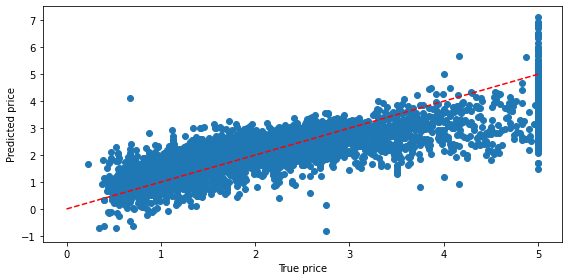

In [98]:
predicted = model.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)

## 라쏘 회귀

In [99]:
from sklearn.linear_model import Lasso

In [100]:
model = Lasso(alpha=0.01)
model.fit(X_train, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [101]:
print('학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.6001459127968081
평가 데이터 점수 : 0.6090970571835432


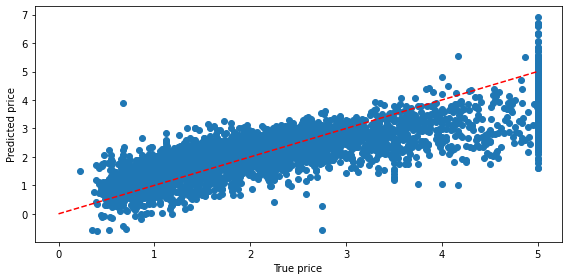

In [102]:
predicted = model.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)

## 신축망 (Elastic-Net)

- 릿지와 라쏘 두 모델의 모든 규제를 사용
- 두 모델의 장점을 갖고 있기 떄문에 좋은 성능을 보임
- 데이터 특성이 많거나 서로 상관관계가 높은 특성이 존재할 때 위의 두 모델보다 좋은 성능을 보여줌

In [103]:
from sklearn.linear_model import ElasticNet

In [104]:
model = ElasticNet(alpha=0.01, l1_ratio=0.5)
model.fit(X_train, y_train)

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [105]:
print('학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.6022049412871684
평가 데이터 점수 : 0.6117961625797798


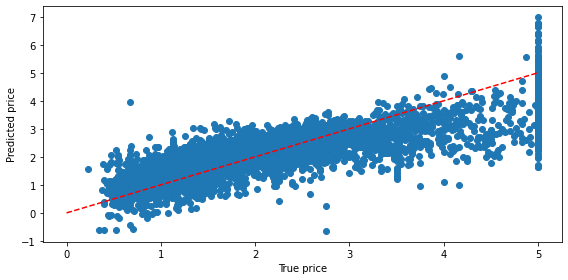

In [106]:
predicted = model.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)

## 직교 정합 추구 (Orthogonal Matchin Pursuit)

- 직교 정합 추구는 모델에 존재하는 가중치 벡터에 특별한 제약을 거는 방법
- 만족하는 파라미터 w를 찾는 것이 목표
- 가중치 벡터 w에서 0이 아닌 값이  k개 이하가 되도록 훈련됨
- 이러한 방법은 모델이 필요 없는 데이터 특성을 훈련 과정에서 자동으로 제거하도록 만들 수 있음

In [107]:
from sklearn.linear_model import OrthogonalMatchingPursuit

In [108]:
model = OrthogonalMatchingPursuit(n_nonzero_coefs=5) # 특성 8개 중 5개만 사용하겠다
model.fit(X_train, y_train)

OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=5, normalize=True,
                          precompute='auto', tol=None)

In [109]:
print('학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.5971896496344393
평가 데이터 점수 : 0.6050132044643665


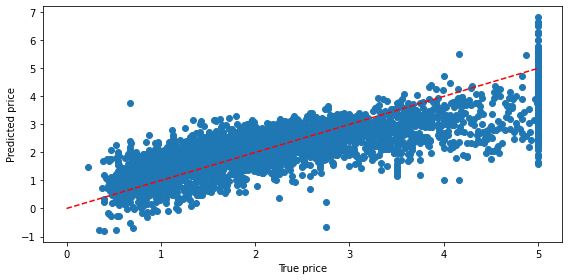

In [110]:
predicted = model.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)

만족하는 조건을 변경

In [111]:
model = OrthogonalMatchingPursuit(tol=1.) # 
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_omp.py:673: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  return_n_iter=True)


OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=None,
                          normalize=True, precompute='auto', tol=1.0)

In [112]:
print('학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.6038381310440168
평가 데이터 점수 : 0.6149716055425619


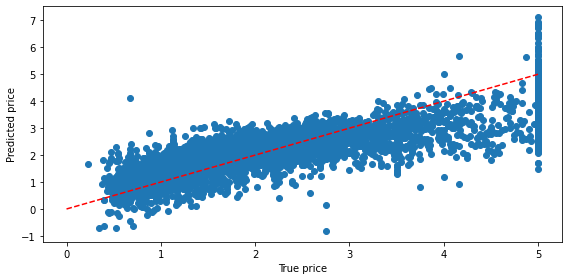

In [113]:
predicted = model.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)

## 다항 회긔 (Polynomial Regression)

- 입력 데이터를 비선형으로 바꾼 후 사용
- 모델 자체는 선형 모델
- 차수가 높아질 수록 더 복잡한 데이터 학습 가능

In [114]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

In [115]:
model = make_pipeline(PolynomialFeatures(degree=2), \
                      StandardScaler(), LinearRegression())
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [116]:
print('학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.6812474113162372
평가 데이터 점수 : 0.6845391872235177


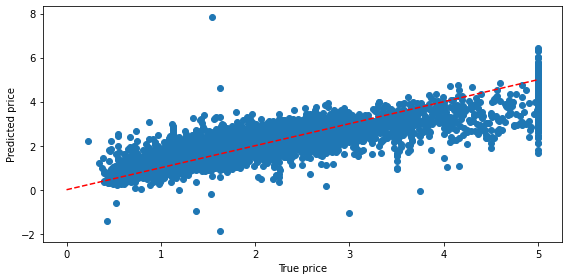

In [117]:
predicted = model.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)